<h1><center> Data Visualisation notebook <h1><center> 

## Questions:
- what is nh
- why don't we have soil moisture in ERA5

In [1]:
import xarray
import matplotlib.pyplot as plt
import os 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Climate models dataset

## 1- CMIP6

- hurs c'est relative humidity

- hursmin c'est le minimum de hurs sur la periode (probablement daily mais ca depend des donnees)

- pr precipitations

- psl sea-level pressure

- sfcWindmax daily maximum near surface wind speed

- tas near-surface temperature

- tos sea surface temperature

- ua vitesse du vent composante u

- va vitesse du vent composante v

- zg geopotential height

In [2]:
DATA_PATH = "/scistor/ivm/data_catalogue/climate_models/cmip6/cmip/EC-Earth3/historical"
TAS = "tas/tas_day_EC-Earth3_historical_r1i1p1f1_gr_18500101-18501231.nc"
ZG = "zg/zg_day_EC-Earth3_historical_r1i1p1f1_gr_18500101-18501231.nc"

zg_path = os.path.join(DATA_PATH, ZG)
tas_path = os.path.join(DATA_PATH, TAS)

In [3]:
print(os.path.exists(DATA_PATH))

True


In [4]:
tas_data = xarray.open_dataset(tas_path)
zg_data = xarray.open_dataset(zg_path)

print(tas_data)
print(zg_data)

<xarray.Dataset> Size: 191MB
Dimensions:    (time: 365, bnds: 2, lat: 256, lon: 512)
Coordinates:
  * time       (time) datetime64[ns] 3kB 1850-01-01T12:00:00 ... 1850-12-31T1...
  * lat        (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
  * lon        (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
    lat_bnds   (lat, bnds) float64 4kB ...
    lon_bnds   (lon, bnds) float64 8kB ...
    tas        (time, lat, lon) float32 191MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time:            0.0
    comment:                Production: Thomas Reerink at KNMI
    contact:                cmip6-data@ec-earth.org
    ...                     ...
    license:                CMIP6 model data produced by EC-Earth-Consortium ...
   

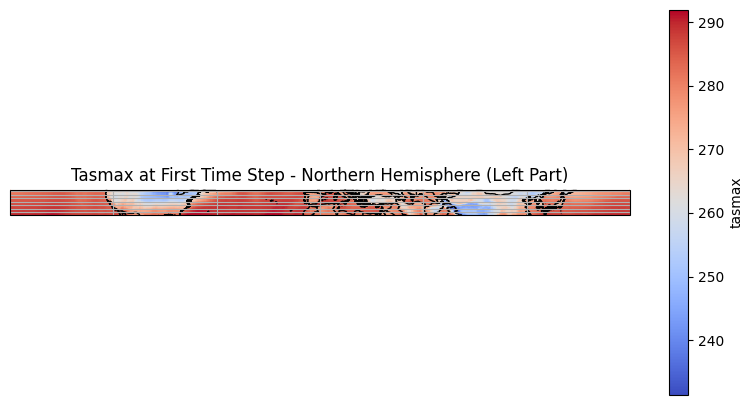

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr


# Select the data variable to plot
tasmax = tas_data['tas']

# Select the first time step for plotting
tasmax_first_time_step = tasmax.isel(time=0)

# Subset the data for the Northern Hemisphere region (left part)
tasmax_nh_left = tasmax_first_time_step.sel(lat=slice(30, 45), lon=slice(0, 360))

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Use pcolormesh for plotting with a colormap
mesh = tasmax_nh_left.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'tasmax'})

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Add gridlines
gl = ax.gridlines(draw_labels=False)
gl.top_labels = False
gl.right_labels = False

plt.title('Tasmax at First Time Step - Northern Hemisphere (Left Part)')
plt.show()


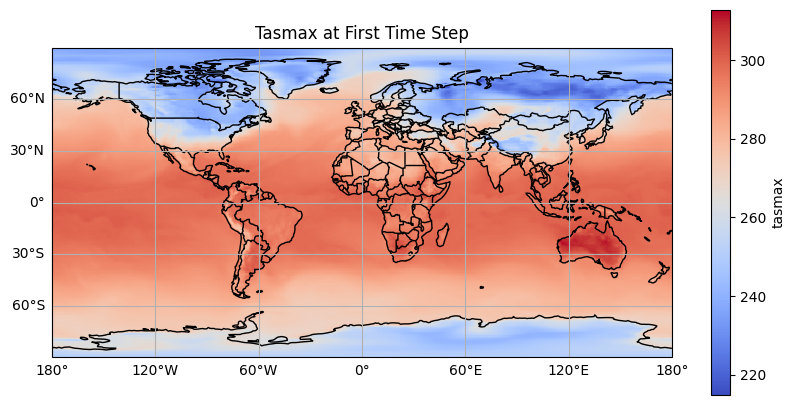

In [6]:
# Select the data variable to plot
tasmax = tas_data['tas']

# Select the first time step for plotting
tasmax_first_time_step = tasmax.isel(time=0)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

tasmax_first_time_step.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'tasmax'})

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.title('Tasmax at First Time Step')
plt.show()

### 1- Visualization of variables


Missing data ?

### 2- Statistical distribution

### 3- Stationnarity

## 2- Lentis Dataset
Variables

Soil moisture (sm - Europe), 
streamfunction 250hpa (steam250, NH),  
Temperature 2m (tas - NH), 
Sea level pressure (psl, NH), 
surface incoming shortwave radiation (rsds,  NH), 
Top of atmosphere outgoing radiation (TOA, equator)

## 3- Reanalysis 
Daily data from 1940-2022. 0.25 degrees spatial resolution, lonlat grid. Streamfunction calculated from u and v winds using cdo.

In [7]:
era_data_path = "/scistor/ivm/data_catalogue/reanalysis/ERA5_0.25"
t2m_path = "T2M/1940-2022_T2M.nc"
stream_path = "STREAM/500hPa/1940_2022_stream_500hPa_lonlat.nc"


In [8]:
# # open both datasets
# t2m_data = xarray.open_dataset(os.path.join(era_data_path, t2m_path))
# stream_data = xarray.open_dataset(os.path.join(era_data_path, stream_path))

# # print the data
# print(t2m_data)


In [9]:
# lat =
# lon =
# time_range = slice('1940-01-01', '1940-01-31')
# t2m_data = t2m_data.sel(time=time_range, latitude=lat, longitude=lon)
# stream_data = stream_data.sel(time=time_range, latitude=lat, longitude=lon)